## 서울시에서 공개한 코로나19 발생동향 분석
* http://www.seoul.go.kr/coronaV/coronaStatus.do

## 분석에 사용할 Pandas 주요기능
* Pandas cheat sheet 를 함께 보세요! : [Pandas_Cheat_Sheet.pdf](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf)

* 파일 불러오기
    * to_csv("파일명", index=False) : csv 파일로 저장하기
    * read_csv("파일명") : csv 파일 불러오기
    
* Pandas를 통한 파일 저장과 불러오기
    * shape를 통한 행과 열의 수 보기
    * head, tail, sample 을 통한 일부 데이터 가져오기
    
* DataFrame의 info(), describe() 등을 통한 요약과 기술통계 값 구하기
    * info()
    * describe()
    * nunique()
    * index
    * columns
    * values
    
* Pandas의  DataFrame과 Series의 이해
    * Series : 1차원 벡터구조
    * DataFrame : 2차원 행렬구조
    
* 색인하기
    * [컬럼]
    * .loc[행]
    * .loc[행, 열]
    * .loc[조건식, 열]
    
* DataFrame의 데이터 타입 이해하기
    * 날짜 데이터의 변환
    
* DataFrame 다루기
    * 열(column) 인덱싱
    * 행(index) 인덱싱
    * 행, 열 인덱싱
    * 정렬하기 : sort_values 사용하기
    * 조건식 사용하기

* 빈도수 구하기
    * 한 개의 변수 : series.value_counts()
    * 두 개의 변수 : pd.crosstab()

* groupby 와 pivot_table
    * 다양한 연산식의 사용


## 라이브러리 로드

In [1]:
# pandas, numpy, matplotlib.pyplot 불러오기

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 시각화 기본 명칭 확인하기
* [Anatomy of a figure — Matplotlib documentation](https://matplotlib.org/stable/gallery/showcase/anatomy.html)

## 시각화 한글폰트 설정하기

In [2]:
# 윈도우 : "Malgun Gothic"
# 맥 : "AppleGothic"
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        !apt-get install fonts-nanum -qq  > /dev/null
        !fc-cache -fv

        import matplotlib as mpl
        mpl.font_manager._rebuild()
        findfont = mpl.font_manager.fontManager.findfont
        mpl.font_manager.findfont = findfont
        mpl.backends.backend_agg.findfont = findfont
        
        font_family = "NanumBarunGothic"
    return font_family


plt.style.use("seaborn-whitegrid")

# 폰트설정
plt.rc("font", family=get_font_family())
# 마이너스폰트 설정
plt.rc("axes", unicode_minus=False)

# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats

set_matplotlib_formats("retina")

C:\Users\computer\AppData\Local\Temp/ipykernel_25576/3064774803.py:39: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats("retina")


In [3]:
# 그래프 그려보기


## 파일 불러오기
<img src="https://pandas.pydata.org/docs/_images/02_io_readwrite.svg">

In [4]:
import glob

glob.glob("data/*")

['data\\seoul-covid19-2021-12-18.csv',
 'data\\seoul-covid19-2021-12-26.csv',
 'data\\전국 평균 분양가격(2013년 9월부터 2015년 8월까지).csv',
 'data\\주택도시보증공사_전국 신규 민간아파트 분양가격 동향_20210930.csv']

In [5]:
glob.glob("data/seoul*.csv") #정규 표현식

['data\\seoul-covid19-2021-12-18.csv', 'data\\seoul-covid19-2021-12-26.csv']

In [6]:
# seoul-covid19-2021-12-18.csv 불러오기
# df_01 변수에 담아 재사용합니다.
df_01 = pd.read_csv("data/seoul-covid19-2021-12-18.csv")
df_01

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
1,199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
2,199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
3,199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
4,199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...,...
199995,5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
199996,4,7,2020-01-30,마포구,중국,해외유입,퇴원
199997,3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
199998,2,5,2020-01-30,중랑구,중국,해외유입,퇴원


## head, tail, sample 로 일부 데이터만 보기

In [7]:
df_01.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
1,199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
2,199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
3,199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
4,199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [8]:
# seoul-covid19-2021-12-26.csv 불러오기
# df_02 변수에 담아 재사용합니다.
df_02 = pd.read_csv('data/seoul-covid19-2021-12-26.csv')
df_02

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN
1,218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN
2,218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN
3,218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN
4,218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN
...,...,...,...,...,...,...,...
18641,200005,562113,2021-12-18,중랑구,-,강남구 소재 빌딩 관련('21.12.(2)),NaN
18642,200004,562220,2021-12-18,송파구,-,기타 확진자 접촉,NaN
18643,200003,560264,2021-12-18,동작구,-,감염경로 조사중,퇴원
18644,200002,562971,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [9]:
# 일부데이터만 가져와보기
df_02.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN
1,218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN
2,218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN
3,218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN
4,218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN


## concat 으로 여러 개의 데이터프레임 합치기


* axis = 0

<img src="https://pandas.pydata.org/docs/_images/merging_concat_basic.png">

* axis = 1 
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1.png">

* 결측치를 제외하기 join="inner"
<img src="https://pandas.pydata.org/docs/_images/merging_concat_axis1_inner.png">


* [Merge, join, concatenate and compare documentation](https://pandas.pydata.org/docs/user_guide/merging.html#merge-join-concatenate-and-compare)

In [10]:
df_01.shape, df_02.shape

((200000, 7), (18646, 7))

In [11]:
# pd.concat 으로 [df_01, df_02] 합치고 df 변수에 할당하기
# df
df = pd.concat([df_01, df_02])
df.shape

(218646, 7)

## 합친 데이터 확인하기

In [12]:
# head, tail, sample 을 통해 데이터 확인하기
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 218646 entries, 0 to 18645
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   연번      218646 non-null  int64 
 1   환자      218646 non-null  int64 
 2   확진일     218646 non-null  object
 3   거주지     218646 non-null  object
 4   여행력     218646 non-null  object
 5   접촉력     218646 non-null  object
 6   퇴원현황    163497 non-null  object
dtypes: int64(2), object(5)
memory usage: 13.3+ MB


In [13]:
df.head()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
0,200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
1,199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
2,199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
3,199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
4,199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [14]:
df.tail()

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황
18641,200005,562113,2021-12-18,중랑구,-,강남구 소재 빌딩 관련('21.12.(2)),NaN
18642,200004,562220,2021-12-18,송파구,-,기타 확진자 접촉,NaN
18643,200003,560264,2021-12-18,동작구,-,감염경로 조사중,퇴원
18644,200002,562971,2021-12-18,중구,-,기타 확진자 접촉,NaN
18645,200001,561831,2021-12-18,중구,-,기타 확진자 접촉,NaN


In [15]:
df.nunique()

연번      218646
환자      218644
확진일        671
거주지         34
여행력        183
접촉력       1417
퇴원현황         2
dtype: int64

In [16]:
df.describe()

,연번,환자
count,218646.000000,218646.000000
mean,109323.500000,322462.160977
std,63117.807816,173903.371149
min,1.000000,2.000000
25%,54662.250000,168409.250000
50%,109323.500000,336181.500000
75%,163984.750000,470149.500000
max,218646.000000,611669.000000


## 중복 제거하기

In [17]:
df[df.duplicated()]

,연번,환자,확진일,거주지,여행력,접촉력,퇴원현황


In [18]:
# 중복 있으면
# df = df.drop_duplicates()

## 인덱스 값 설정하기
* 전체 데이터프레임의 행의 갯수와 "연번"의 유일값을 확인하면 중복값이 없는 것으로 확인할 수 있습니다.
* shape와 nunique()로 행의 수와 유일값이 일치하는지 확인합니다.

In [19]:
# shape
df.shape

(218646, 7)

In [20]:
# 연번의 nunique()
df['연번'].nunique()

218646

In [21]:
# set_index 를 통해 인덱스 값을 변경합니다.
df = df.set_index('연번')
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
200000,561465,2021-12-18,중구,-,기타 확진자 접촉,NaN
199999,562278,2021-12-18,구로구,-,구로구 소재 요양시설 관련('21.11.),NaN
199998,562213,2021-12-18,금천구,-,기타 확진자 접촉,NaN
199997,562362,2021-12-18,중구,-,감염경로 조사중,NaN
199996,560491,2021-12-18,중구,-,기타 확진자 접촉,NaN
...,...,...,...,...,...,...
200005,562113,2021-12-18,중랑구,-,강남구 소재 빌딩 관련('21.12.(2)),NaN
200004,562220,2021-12-18,송파구,-,기타 확진자 접촉,NaN
200003,560264,2021-12-18,동작구,-,감염경로 조사중,퇴원


## 연번 순으로 정렬하기

In [22]:
# sort_index 를 통해 인덱스값 기준으로 정렬합니다.
df = df.sort_index()
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원
2,5,2020-01-30,중랑구,중국,해외유입,퇴원
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원
4,7,2020-01-30,마포구,중국,해외유입,퇴원
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원
...,...,...,...,...,...,...
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN


In [23]:
# head 로 미리보기 합니다.
df.head(2)

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원
2,5,2020-01-30,중랑구,중국,해외유입,퇴원


In [24]:
# tail로 미리보기 합니다.
df.tail(2)

,환자,확진일,거주지,여행력,접촉력,퇴원현황
연번,,,,,,
218645,610703,2021-12-26,노원구,-,감염경로 조사중,NaN
218646,611159,2021-12-26,노원구,-,감염경로 조사중,NaN


## 판다스의 attributes
* [Series — pandas documentation](https://pandas.pydata.org/docs/reference/series.html#attributes)
* [DataFrame — pandas documentation](https://pandas.pydata.org/docs/reference/frame.html#attributes-and-underlying-data)


In [25]:
# shape
df.shape

(218646, 6)

In [26]:
# dtypes
df.dtypes

환자       int64
확진일     object
거주지     object
여행력     object
접촉력     object
퇴원현황    object
dtype: object

In [27]:
# columns
df.columns

Index(['환자', '확진일', '거주지', '여행력', '접촉력', '퇴원현황'], dtype='object')

In [28]:
# index
df.index

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            218637, 218638, 218639, 218640, 218641, 218642, 218643, 218644,
            218645, 218646],
           dtype='int64', name='연번', length=218646)

## 데이터 요약

In [29]:
# info를 통해 데이터를 요약합니다.
df.info

<bound method DataFrame.info of             환자         확진일  거주지 여행력        접촉력 퇴원현황
연번                                                 
1            2  2020-01-24  강서구  중국       해외유입   퇴원
2            5  2020-01-30  중랑구  중국       해외유입   퇴원
3            6  2020-01-30  종로구   -   종로구 집단발병   퇴원
4            7  2020-01-30  마포구  중국       해외유입   퇴원
5            9  2020-01-31  성북구   -  기타 확진자 접촉   퇴원
...        ...         ...  ...  ..        ...  ...
218642  607522  2021-12-26  송파구   -   감염경로 조사중  NaN
218643  607530  2021-12-26  송파구   -   감염경로 조사중  NaN
218644  611537  2021-12-26  송파구   -   감염경로 조사중  NaN
218645  610703  2021-12-26  노원구   -   감염경로 조사중  NaN
218646  611159  2021-12-26  노원구   -   감염경로 조사중  NaN

[218646 rows x 6 columns]>

## 결측치 보기

In [30]:
# 결측치의 합계를 구합니다.
# isnull()
df.isnull().sum()

환자          0
확진일         0
거주지         0
여행력         0
접촉력         0
퇴원현황    55149
dtype: int64

In [31]:
# 평균(mean)을 통해 결측치의 비율을 구합니다.
df.isnull().mean()

환자      0.00000
확진일     0.00000
거주지     0.00000
여행력     0.00000
접촉력     0.00000
퇴원현황    0.25223
dtype: float64

## 기술통계

In [32]:
# describe()로 기술통계 값을 구합니다.
df.describe()

,환자
count,218646.000000
mean,322462.160977
std,173903.371149
min,2.000000
25%,168409.250000
50%,336181.500000
75%,470149.500000
max,611669.000000


In [33]:
# describe(include="object") 로 문자 데이터에 대한 기술통계 값을 구합니다.
df.describe(include="object")

,확진일,거주지,여행력,접촉력,퇴원현황
count,218646,218646,218646,218646,163497
unique,671,34,183,1417,2
top,2021-12-14,송파구,-,기타 확진자 접촉,퇴원
freq,3165,13235,215575,90055,161849


## 날짜 데이터 타입 변경하기

* 확진일 Series 형태로 가져오기
<img src="https://pandas.pydata.org/docs/_images/01_table_series.svg">

In [34]:
# 확진일 Series 형태로 가져오기
df["확진일"].head(1)

연번
1    2020-01-24
Name: 확진일, dtype: object

In [35]:
# pd.to_datetime 을 통한 데이터 타입 변경하기
df["확진일"] = pd.to_datetime(df["확진일"])

In [36]:
# df["확진일"]을 head() 로 일부만 가져와서 타입이  datetime64 형태로 변경되었는지 확인하기
df["확진일"].head(1)

연번
1   2020-01-24
Name: 확진일, dtype: datetime64[ns]

## 파생변수 만들기
### 연, 월, 일, 요일 만들기

In [37]:
# 연도 파생변수 만들기
# df["연도"]
df["연도"] = df["확진일"].dt.year
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도
연번,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020


In [38]:
# 월(month), 일(day), 요일(dayofweek) 만들기
# df["월"]
# df["일"]
# df["요일"]
df["월"] = df["확진일"].dt.month
df["일"] = df["확진일"].dt.day
df["요일"] = df["확진일"].dt.dayofweek

In [39]:
# 확진일, 연도, 월, 일, 요일 컬럼만 가져오기
# head 로 일부만 가져와 파생변수가 잘 생성되었는지 확인하기
df.head(1)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일
연번,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4


### 연도-월 만들기

In [40]:
# 연도-월 파생변수 만들기
# astype(str) 을 통해 수치 데이터를 문자 데이터로 변환하고 문자열 연결하기
df["연도"].astype(str) + "-" + df["월"].astype(str)

연번
1          2020-1
2          2020-1
3          2020-1
4          2020-1
5          2020-1
           ...   
218642    2021-12
218643    2021-12
218644    2021-12
218645    2021-12
218646    2021-12
Length: 218646, dtype: object

In [41]:
# 문자열 슬라이싱으로도 만들 수 있습니다.
# df["연도월"]
df["연도월"] = df["확진일"].astype(str).str[:7]

In [42]:
# df["연도월"]이 잘 생성되었는지 확인하기
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월
연번,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-01
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01
...,...,...,...,...,...,...,...,...,...,...,...
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12


### 요일 한글로 만들기
* 함수와 Series의 map 활용

In [43]:
dayofweek = "월화수목금토일"
dayofweek[1]

'화'

In [44]:
#find_dayofweek 함수로 요일 숫자를 넘겨주면 요일명을 반환하는 함수

def find_dayofweek(day_no):
    return dayofweek[day_no]

In [45]:
# 함수가 잘 만들어졌는지 확인하기
find_dayofweek(2)

'수'

In [46]:
# map을 사용해서 요일 컬럼을 요일명으로 변환하고 "요일명"이라는 새로운 컬럼에 저장하기
df["요일명"] = df["요일"].map(find_dayofweek)

In [47]:
# ["요일", "요일명"]을 sample(5) 로 임의의 5개만 불러와 잘 변환이 되었는지 확인하기
df[['요일', '요일명']].sample(5)

,요일,요일명
연번,,
91232,5,토
112138,0,월
73882,4,금
23191,4,금
141606,6,일


## 전체 수치 변수 히스토그램 그리기

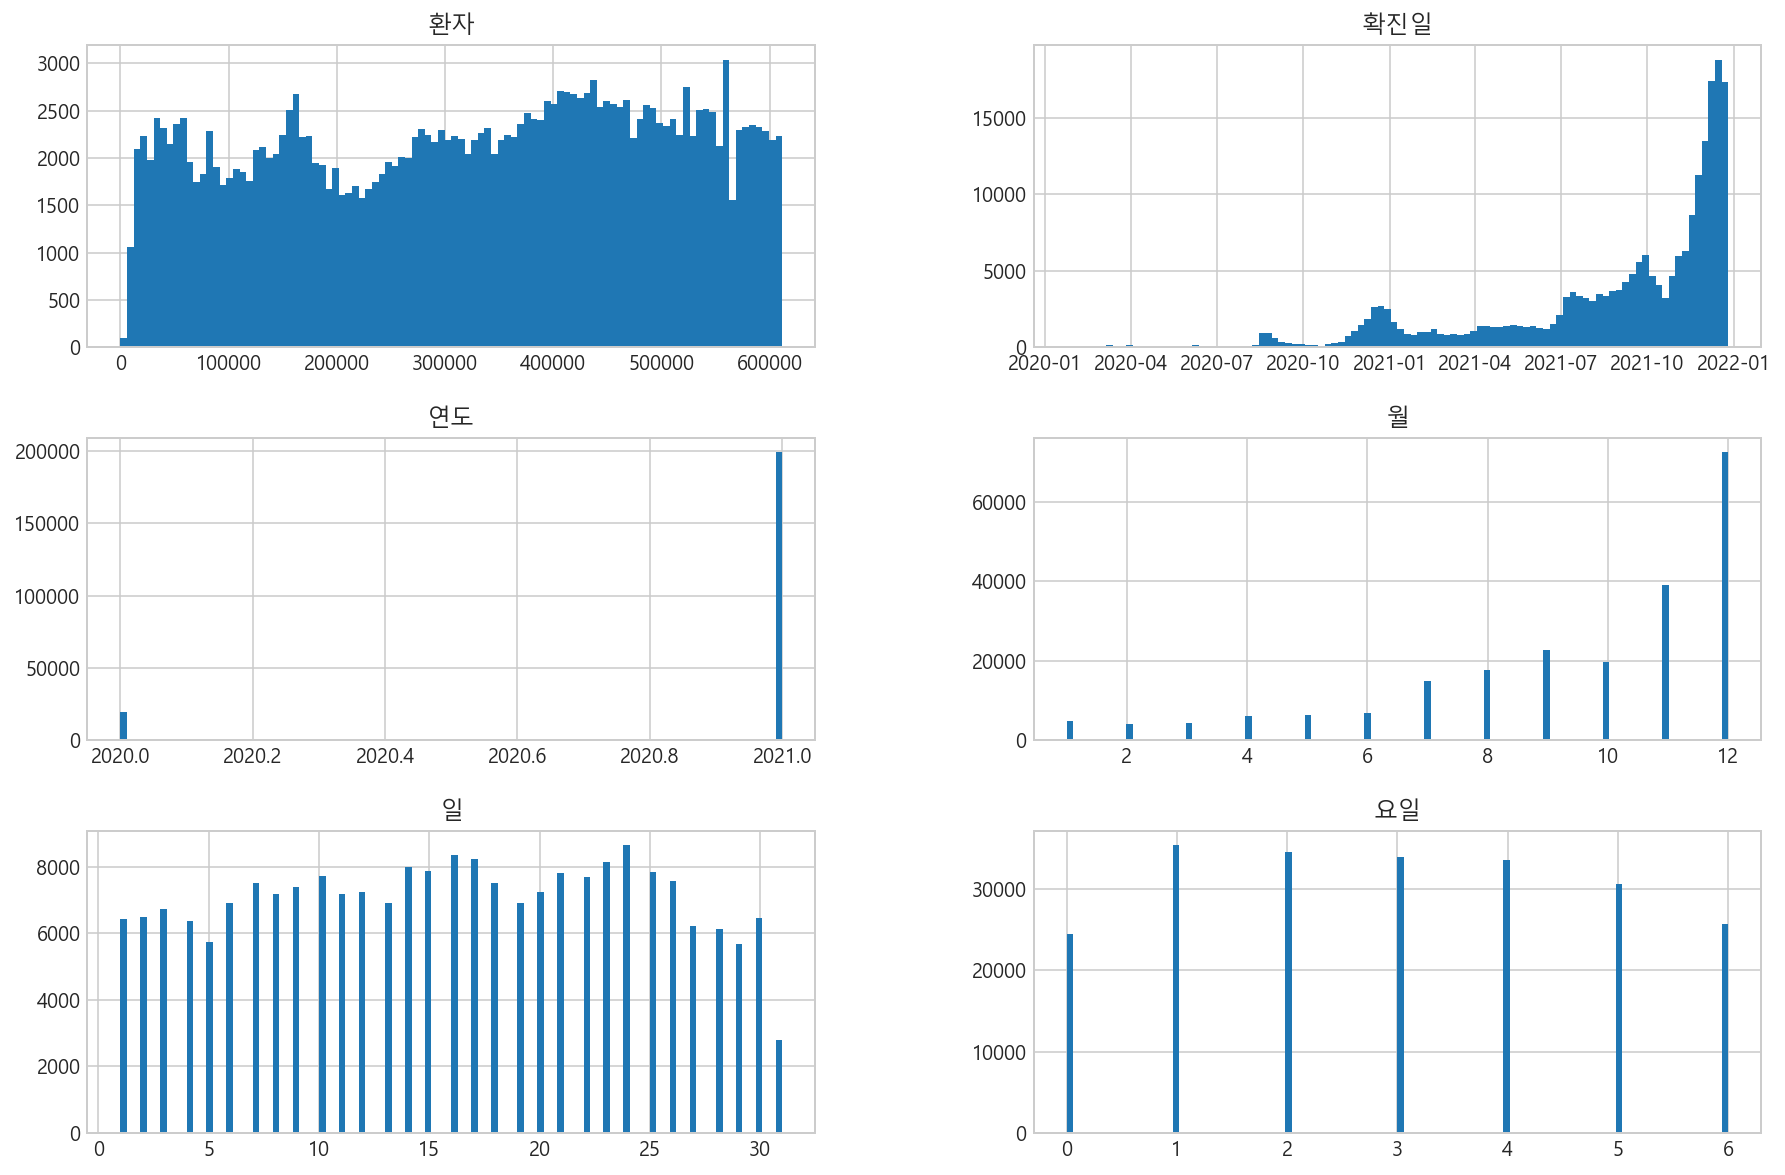

In [48]:
# df.hist로 히스토그램 그리기
df.hist(figsize = (15,10), bins = 100)
plt.show()

## value_counts로 하나의 변수에 대한 빈도수 구하기
### 연도

In [49]:
# "연도" 컬럼을 통해 빈도수 구하기
df["연도"].value_counts()

2021    199253
2020     19393
Name: 연도, dtype: int64

In [50]:
# "연도" 컬럼의 비율 구하기
df["연도"].value_counts(normalize = True)*100

2021    91.130412
2020     8.869588
Name: 연도, dtype: float64

### 연도월

In [112]:
# 연도월에 대한 빈도수 구하기
# 빈도수를 구하고 sort_index 로 정렬합니다.
year_month = df["연도월"].value_counts().sort_index()
year_month

2020-01        7
2020-02       80
2020-03      391
2020-04      156
2020-05      229
2020-06      459
2020-07      281
2020-08     2415
2020-09     1306
2020-10      733
2020-11     2904
2020-12    10432
2021-01     4878
2021-02     4060
2021-03     3897
2021-04     5803
2021-05     6030
2021-06     6258
2021-07    14504
2021-08    15193
2021-09    21382
2021-10    18840
2021-11    36267
2021-12    62141
Name: 연도월, dtype: int64

<AxesSubplot:title={'center':'연도월별 확진 수'}>

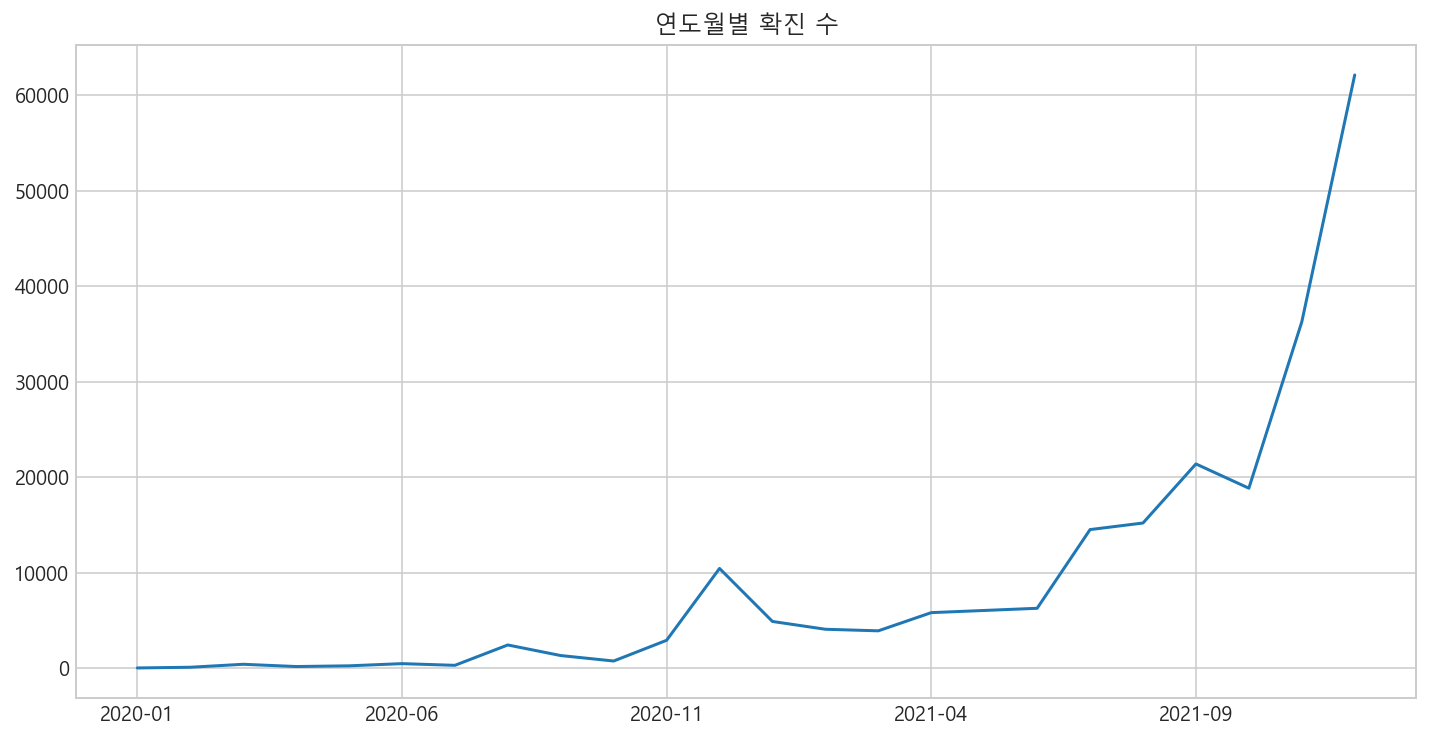

In [52]:
# 연도월을 시각화 합니다.
year_month.plot(title = '연도월별 확진 수', figsize = (12,6))

<AxesSubplot:title={'center':'연도월별 확진 수'}>

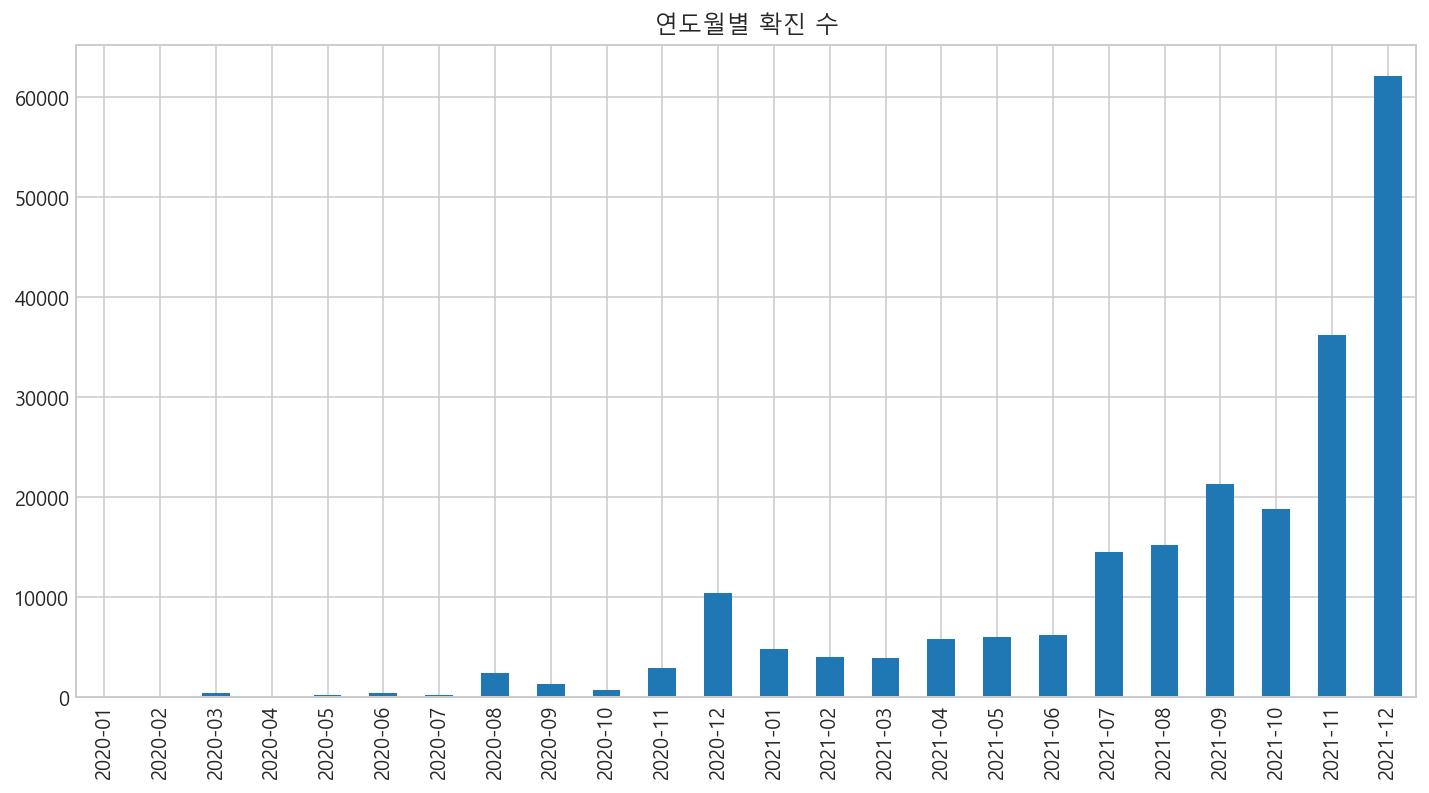

In [53]:
# 연도월을 막대 그래프로 시각화 합니다.
year_month.plot(kind = 'bar' ,title = '연도월별 확진 수', figsize = (12,6))

### 요일별 빈도수 구하기

In [54]:
# 빈도수 구하고 인덱스 번호로 정렬합니다.
# weekday_count 변수에 담아 재사용합니다.
weekday_count = df["요일"].value_counts().sort_index()
weekday_count


0    24516
1    35471
2    34548
3    34030
4    33655
5    30692
6    25734
Name: 요일, dtype: int64

In [55]:
# 리스트컴프리헨션 사용해서 리스트 만들기
# "월화수목금토일" 리스트로 만들어 weekday_list 변수로 재사용하기
weekday_list = [i for i in '월화수목금토일'] 
weekday_list

['월', '화', '수', '목', '금', '토', '일']

In [56]:
# 인덱스 값을 요일명으로 변경하고 시각화 합니다.
weekday_count.index = weekday_list
weekday_count

월    24516
화    35471
수    34548
목    34030
금    33655
토    30692
일    25734
Name: 요일, dtype: int64

<AxesSubplot:>

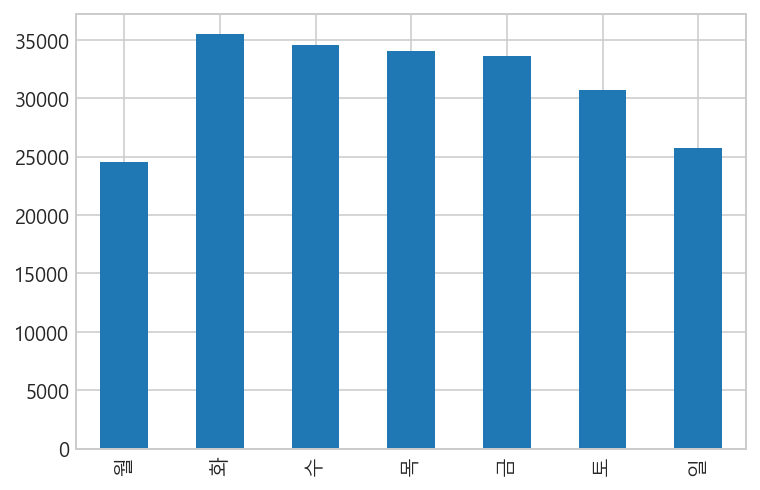

In [57]:
weekday_count.plot(kind = "bar")

### 확진일 빈도수 구하기

In [58]:
# df["확진일"] 빈도수 구하고 인덱스 값인 날짜로 정렬하기
day_count = df["확진일"].value_counts().sort_index()
day_count

2020-01-24       1
2020-01-30       3
2020-01-31       3
2020-02-02       1
2020-02-05       2
              ... 
2021-12-22    2719
2021-12-23    2346
2021-12-24    2123
2021-12-25    1917
2021-12-26    1496
Name: 확진일, Length: 671, dtype: int64

<AxesSubplot:title={'center':'일자별 확진 수'}>

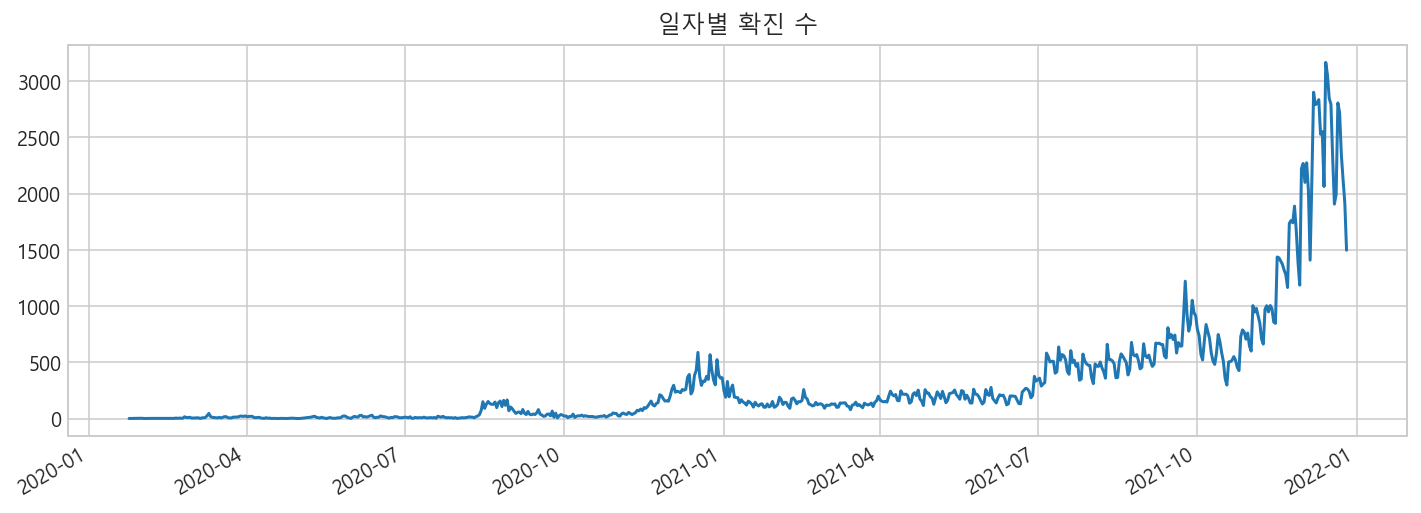

In [59]:
# 선 그래프로 시각화 하기
day_count.plot(figsize = (12, 4), title = "일자별 확진 수")

## 전체 확진일 데이터 만들기
### tail로 초기 데이터 보기

In [60]:
# head(10)로 10번째 확진 데이터를 봅니다.
df.head(10)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01,금
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금
6,10,2020-01-31,종로구,-,종로구 집단발병,퇴원,2020,1,31,4,2020-01,금
7,11,2020-01-31,종로구,-,종로구 집단발병,퇴원,2020,1,31,4,2020-01,금
8,13,2020-02-02,타시도,중국,해외유입,퇴원,2020,2,2,6,2020-02,일
9,19,2020-02-05,송파구,아시아,해외유입,퇴원,2020,2,5,2,2020-02,수


### iloc를 통해 첫 확진일과 마지막 확진일자 찾기

In [61]:
# last_day

last_day = df.iloc[-1]["확진일"]
last_day

Timestamp('2021-12-26 00:00:00')

In [62]:
# first_day
first_day = df.iloc[0]["확진일"]
first_day

Timestamp('2020-01-24 00:00:00')

### date_range로 전체 기간 데이터 만들기

In [63]:
# pd.date_range 로 전체 기간을 생성합니다.
all_day = pd.date_range(first_day, last_day)
all_day

DatetimeIndex(['2020-01-24', '2020-01-25', '2020-01-26', '2020-01-27',
               '2020-01-28', '2020-01-29', '2020-01-30', '2020-01-31',
               '2020-02-01', '2020-02-02',
               ...
               '2021-12-17', '2021-12-18', '2021-12-19', '2021-12-20',
               '2021-12-21', '2021-12-22', '2021-12-23', '2021-12-24',
               '2021-12-25', '2021-12-26'],
              dtype='datetime64[ns]', length=703, freq='D')

In [64]:
# all_day 를 데이터프레임으로 변환합니다.
df_all_day = all_day.to_frame()
df_all_day

,0
2020-01-24,2020-01-24
2020-01-25,2020-01-25
2020-01-26,2020-01-26
2020-01-27,2020-01-27
2020-01-28,2020-01-28
...,...
2021-12-22,2021-12-22
2021-12-23,2021-12-23
2021-12-24,2021-12-24
2021-12-25,2021-12-25


In [65]:
# "확진수" 라는 컬럼을 생성해서 위에서 구한 day_count 를 추가합니다.
# 확진자가 없는 날도 인덱스에 생성이 됩니다.
df_all_day["확진수"] = day_count
df_all_day

,0,확진수
2020-01-24,2020-01-24,1.0
2020-01-25,2020-01-25,NaN
2020-01-26,2020-01-26,NaN
2020-01-27,2020-01-27,NaN
2020-01-28,2020-01-28,NaN
...,...,...
2021-12-22,2021-12-22,2719.0
2021-12-23,2021-12-23,2346.0
2021-12-24,2021-12-24,2123.0
2021-12-25,2021-12-25,1917.0


In [66]:
# 필요 없는 0 컬럼을 삭제합니다.
del df_all_day[0]

### 결측치 채우기

In [67]:
# 비어있는 값은 확진자가 없었던 날이기 때문에 fillna로 0으로 채웁니다.
df_all_day = df_all_day.fillna(0)
df_all_day

,확진수
2020-01-24,1.0
2020-01-25,0.0
2020-01-26,0.0
2020-01-27,0.0
2020-01-28,0.0
...,...
2021-12-22,2719.0
2021-12-23,2346.0
2021-12-24,2123.0
2021-12-25,1917.0


<AxesSubplot:>

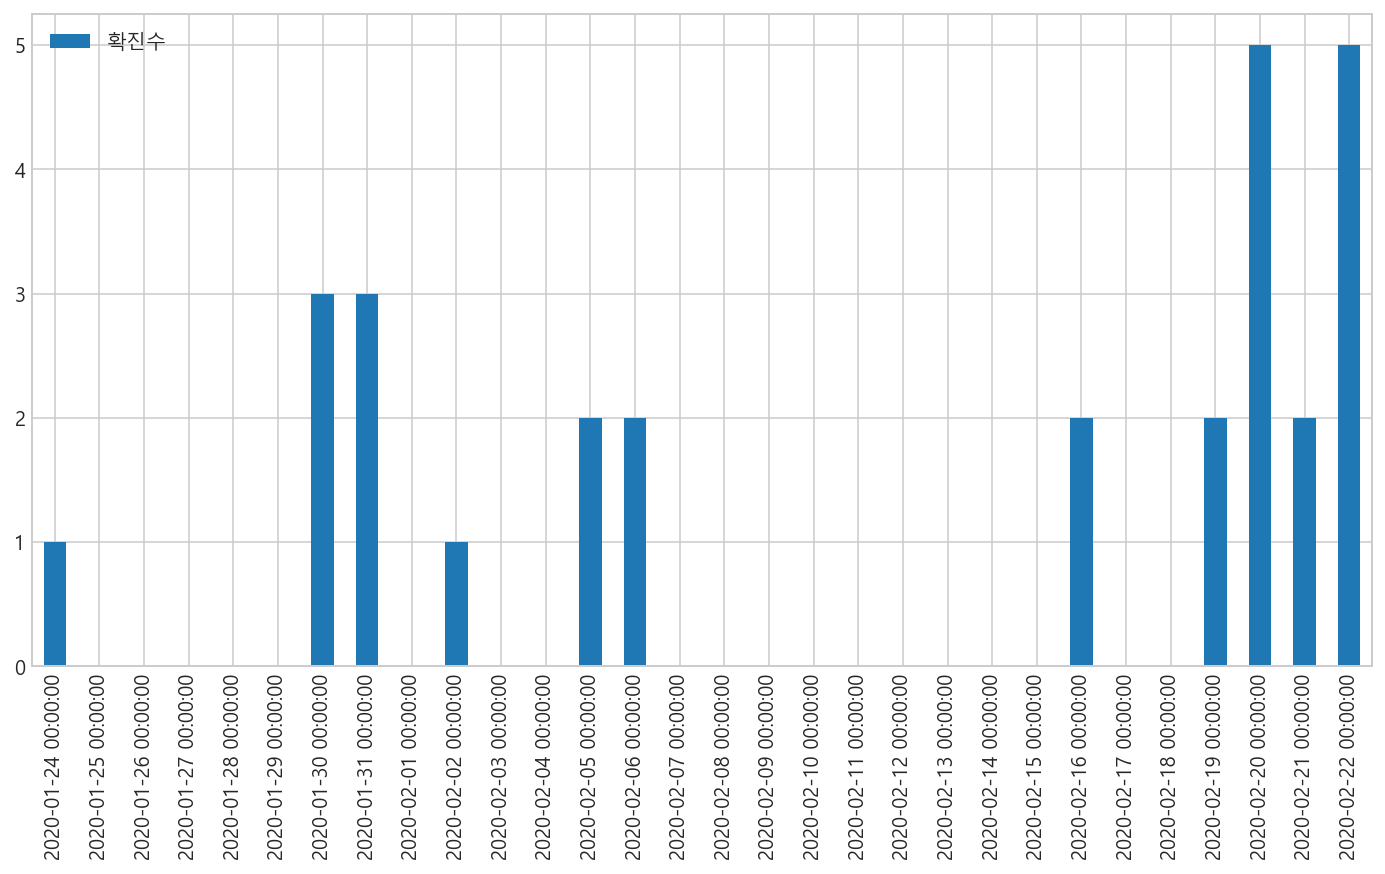

In [68]:
# day_count 에서 초기 30개의 데이터에 대해서 슬라이싱 해서 시각화 합니다.
df_all_day[:30].plot.bar(figsize = (12,6))

### 누적 확진 수 구하기

In [69]:
# df
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01,금
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금
...,...,...,...,...,...,...,...,...,...,...,...,...
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일


In [70]:
# cumsum 으로 "누적확진수" 구해서 새로운 변수에 담기
# df_all_day["누적확진수"]
df_all_day['누적확진수'] = df_all_day['확진수'].cumsum()
df_all_day

,확진수,누적확진수
2020-01-24,1.0,1.0
2020-01-25,0.0,1.0
2020-01-26,0.0,1.0
2020-01-27,0.0,1.0
2020-01-28,0.0,1.0
...,...,...
2021-12-22,2719.0,210764.0
2021-12-23,2346.0,213110.0
2021-12-24,2123.0,215233.0
2021-12-25,1917.0,217150.0


<AxesSubplot:>

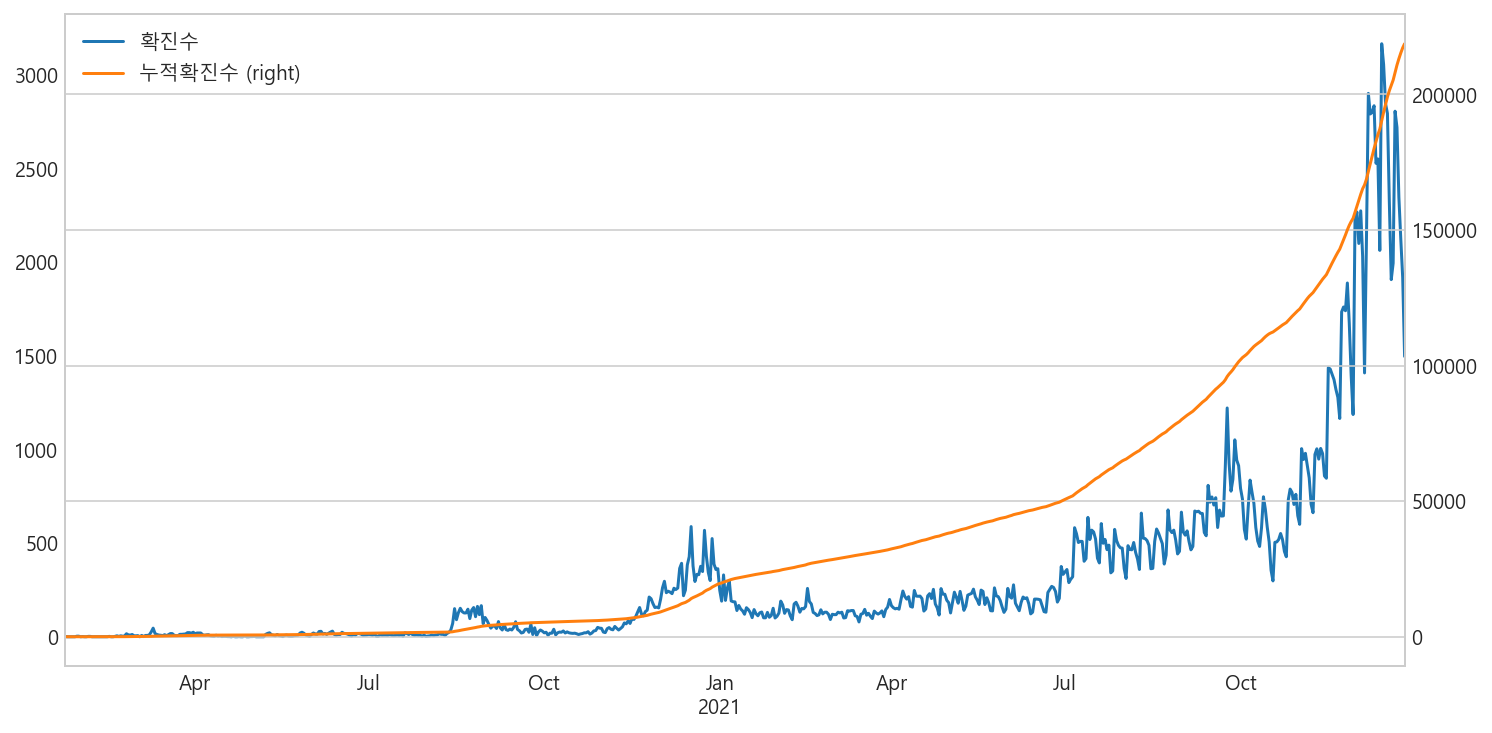

In [71]:
# 시각화 하기
df_all_day.plot(secondary_y = '누적확진수',figsize = (12,6))

## 거주지

In [72]:
# 거주지 빈도수 구하기
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명
연번,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01,금
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금
...,...,...,...,...,...,...,...,...,...,...,...,...
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일


### 타시도, 기타 전처리

In [73]:
# "거주지" => "거주구"로 사본 생성
# df["거주구"]
df['거주구'] = df['거주지']
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01,금,강서구
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,중랑구
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목,종로구
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,마포구
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구


In [74]:
# 텍스트 앞뒤 공백 제거하기
df['거주구'] = df['거주구'].str.strip()

In [75]:
# 타시도 => 기타로 변경하기
df['거주구'] = df['거주구'].str.replace('타시도', '기타')
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01,금,강서구
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,중랑구
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목,종로구
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,마포구
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금,성북구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구


<AxesSubplot:>

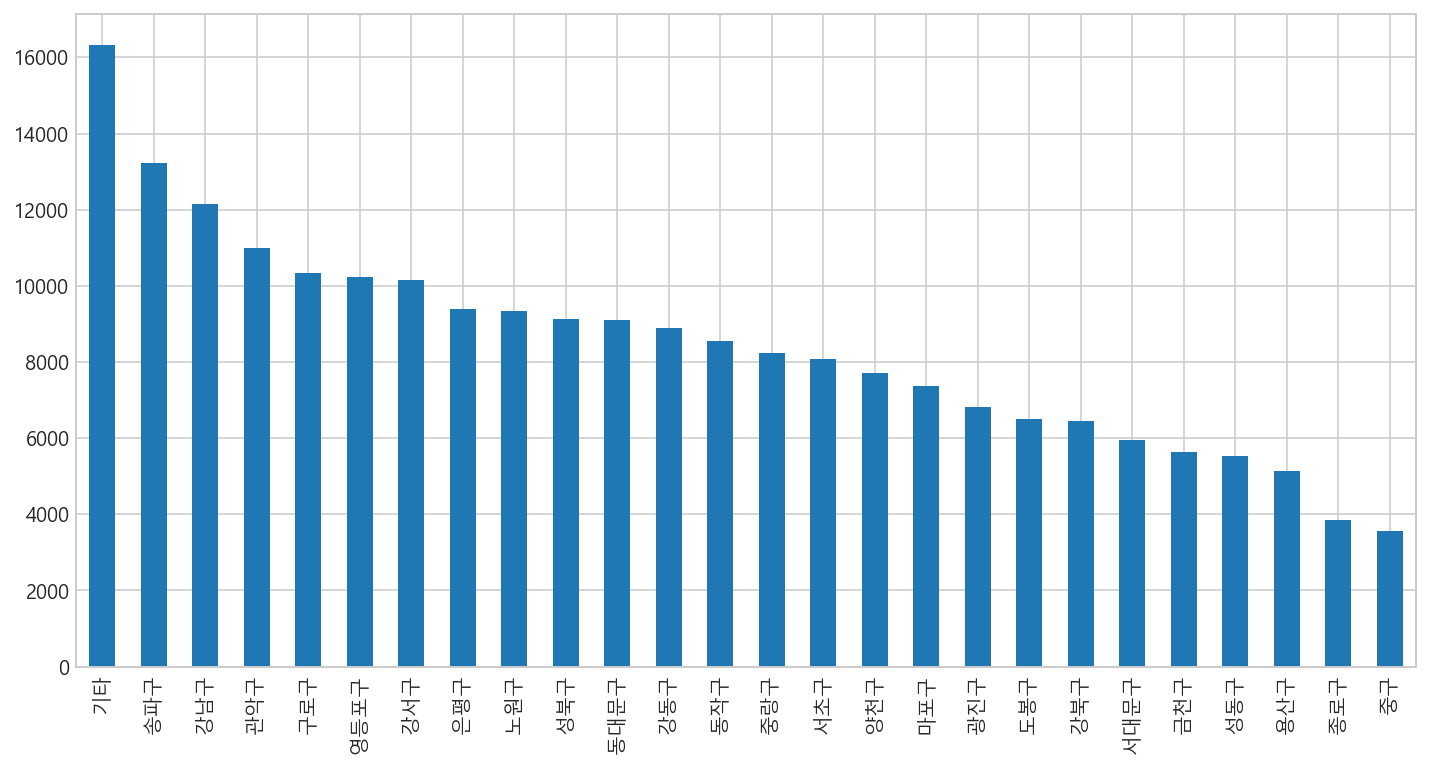

In [76]:
# "거주구" 빈도수 구하기
df['거주구'].value_counts().plot.bar(figsize = (12,6))

In [77]:
# gu_count 변수에 담긴 값 시각화 하기


## 두 개의 변수에 대한 빈도수 구하기
### 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기

In [78]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도수 구하기
# 연도, 퇴원현황 빈도수 구하기
pd.crosstab(df['연도'],df['퇴원현황'])

퇴원현황,사망,퇴원
연도,,
2020,308,19085
2021,1340,142764


In [79]:
# pd.crosstab 으로 연도, 퇴원현황 두 개의 변수에 대한 빈도 빈율 구하기
pd.crosstab(df['연도'],df['퇴원현황'], normalize = True)*100

퇴원현황,사망,퇴원
연도,,
2020,0.188383,11.672997
2021,0.819587,87.319033


<AxesSubplot:xlabel='연도'>

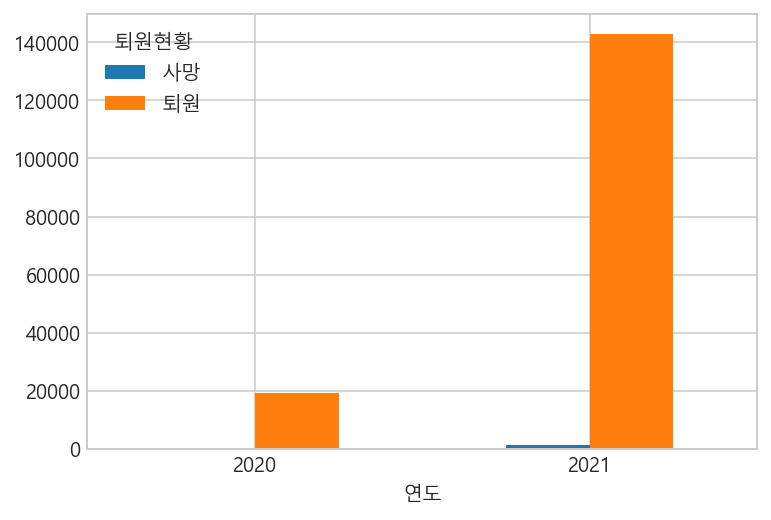

In [80]:
pd.crosstab(df['연도'],df['퇴원현황']).plot.bar(rot=0)

### 연도, 월 두 개의 변수에 대한 빈도수 구하기

In [81]:
# pd.crosstab 으로 연도, 월 두 개의 변수에 대한 빈도수 구하기
ym = pd.crosstab(df['연도'],df['월'])

In [82]:
pd.crosstab(df['연도'],df['월'], normalize = True)*100

월,1,2,3,4,5,6,7,8,9,10,11,12
연도,,,,,,,,,,,,
2020,0.003202,0.036589,0.178828,0.071348,0.104736,0.209928,0.128518,1.104525,0.597313,0.335245,1.328174,4.771183
2021,2.231004,1.856883,1.782333,2.654062,2.757883,2.862161,6.633554,6.948675,9.779278,8.616668,16.587086,28.420826


<AxesSubplot:xlabel='연도'>

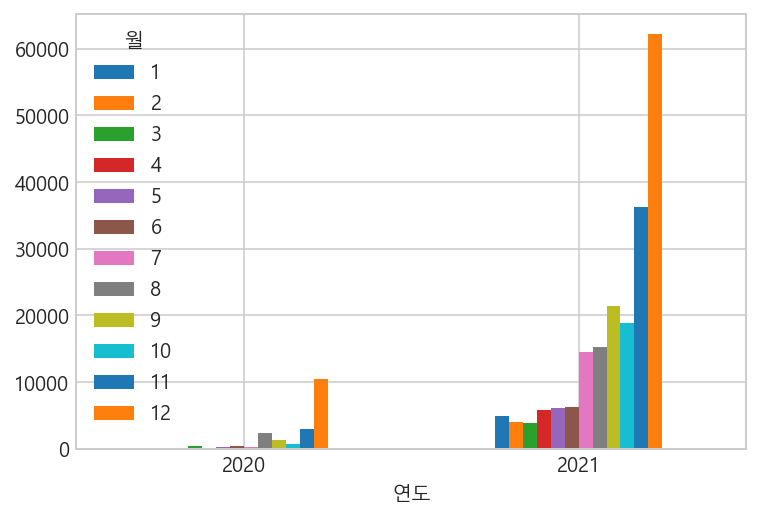

In [83]:
# 시각화 하기
pd.crosstab(df['연도'],df['월']).plot.bar(rot = 0)

<AxesSubplot:xlabel='월'>

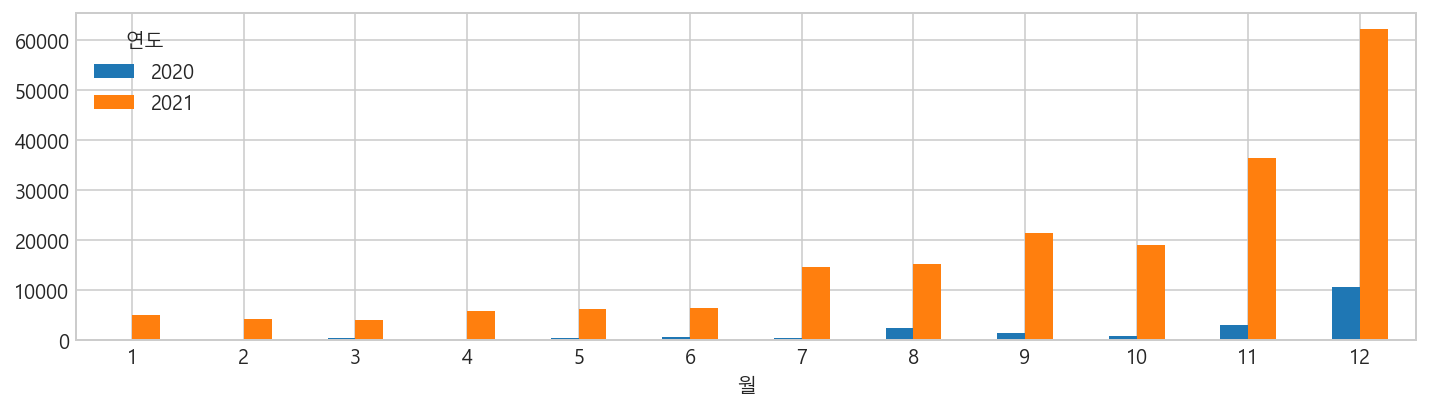

In [84]:
ym.T.plot.bar(rot = 0, figsize = (12,3))

### 연도, 요일 두 개의 변수에 대한 빈도수 구하기

In [85]:
# pd.crosstab 으로 연도, 요일 두 개의 변수에 대한 빈도수 구하기
a = pd.crosstab(df['연도'], df['요일'])
a

요일,0,1,2,3,4,5,6
연도,,,,,,,
2020,2626,2896,2890,3462,2701,2676,2142
2021,21890,32575,31658,30568,30954,28016,23592


In [86]:
# 리스트컴프리헨션 사용해서 리스트 만들기
weekday_list = [i for i in '월화수목금토일']

In [87]:
# 컬럼명 변경하기
a.columns = weekday_list
a

,월,화,수,목,금,토,일
연도,,,,,,,
2020,2626,2896,2890,3462,2701,2676,2142
2021,21890,32575,31658,30568,30954,28016,23592


<AxesSubplot:xlabel='연도'>

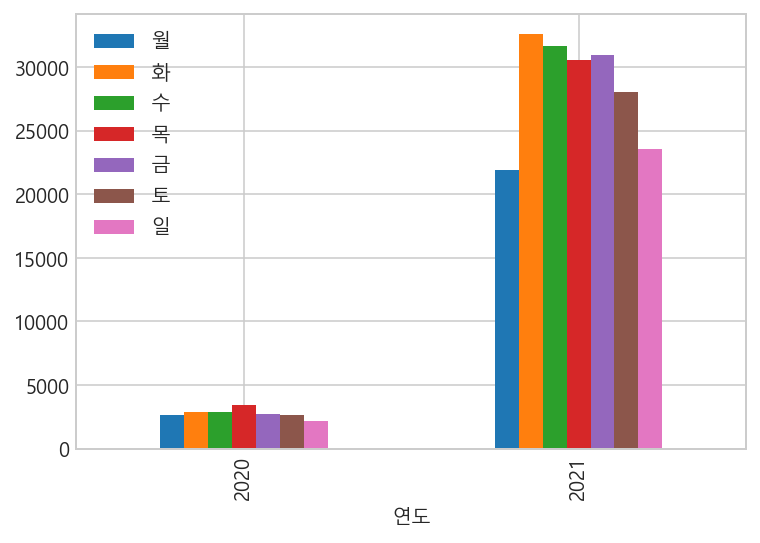

In [88]:
a.plot.bar()

### 거주구, 연도월에 대한 빈도수 구하기

In [89]:
# pd.crosstab 으로 두 개 변수에 대한 빈도수 구하기
# 거주구, 연도월에 대한 빈도수 구하기
lym = pd.crosstab(df['거주구'], df['연도월'])
lym.iloc[:3, :7]

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07
거주구,,,,,,,
강남구,0,7,34,23,11,8,15
강동구,0,4,6,3,11,11,14
강북구,0,0,5,0,9,10,4


In [90]:
print(plt.colormaps())

['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r',

In [91]:
# background_gradient() 로 빈도수 표현하기
lym.style.background_gradient(cmap = 'Oranges') # _r 은 색상을 반전시킨다.

연도월,2020-01,2020-02,2020-03,2020-04,2020-05,2020-06,2020-07,2020-08,2020-09,2020-10,2020-11,2020-12,2021-01,2021-02,2021-03,2021-04,2021-05,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12
거주구,,,,,,,,,,,,,,,,,,,,,,,,
강남구,0,7,34,23,11,8,15,88,84,87,156,422,227,118,240,428,529,792,1249,1287,1224,905,1286,2930
강동구,0,4,6,3,11,11,14,94,42,19,74,304,179,161,252,253,314,284,523,456,884,940,1582,2473
강북구,0,0,5,0,9,10,4,85,31,15,41,245,174,124,125,133,266,164,348,333,568,649,1162,1958
강서구,1,1,20,4,19,33,25,117,65,22,305,727,215,96,133,217,189,213,576,651,895,711,1771,3144
관악구,0,4,30,9,16,58,27,106,135,86,74,472,162,182,129,313,226,268,1133,1001,1064,802,1809,2886
광진구,0,1,5,2,6,3,5,74,34,11,43,277,120,155,253,238,215,236,468,531,891,485,985,1781
구로구,0,1,33,1,6,45,5,60,32,22,72,347,181,237,126,142,183,160,566,629,1424,1566,2021,2487
금천구,0,1,11,0,3,17,7,34,20,5,27,201,72,69,26,84,146,103,334,374,595,656,1179,1672
기타,0,10,22,13,12,25,12,175,128,82,204,1621,606,415,243,319,249,341,682,807,1206,1273,2549,5322


In [92]:
# gu_month.T 로 행과 열을 바꾼 뒤에 보기
# background_gradient()
lym.T.style.background_gradient(cmap = 'Oranges')

거주구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,기타,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
연도월,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-01,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,3,0,1
2020-02,7,4,0,1,4,1,1,1,10,8,0,1,1,0,4,4,3,1,12,1,1,0,7,8,0,0
2020-03,34,6,5,20,30,5,33,11,22,12,6,25,23,16,9,21,3,13,15,17,18,12,14,4,5,12
2020-04,23,3,0,4,9,2,1,0,13,3,3,5,7,7,6,13,13,9,10,3,4,6,7,1,1,3
2020-05,11,11,9,19,16,6,6,3,12,8,10,3,9,3,8,4,21,5,11,7,11,20,7,3,3,3
2020-06,8,11,10,33,58,3,45,17,25,13,43,4,13,12,8,15,9,4,7,42,29,12,18,3,3,14
2020-07,15,14,4,25,27,5,5,7,12,6,2,6,17,14,6,7,8,9,44,1,7,4,11,6,8,11
2020-08,88,94,85,117,106,74,60,34,175,192,73,74,110,79,52,79,33,244,161,78,67,48,122,37,30,103
2020-09,84,42,31,65,135,34,32,20,128,60,69,34,57,30,34,52,30,48,79,31,53,21,65,23,8,41


## Boolean Indexing 으로 특정 조건 값 찾기
### 여러 조건 비교하기

In [93]:
# 강남구에서 "일요일"에 확진된 데이터만 찾기
# .loc[행]
# .loc[행, 열]
# .loc[조건, 열]

b = df[(df['거주구'] == '강남구') & (df['요일명'] == '일')]
b

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
90,3616,2020-03-01,강남구,-,감염경로 조사중,퇴원,2020,3,1,6,2020-03,일,강남구
126,7280,2020-03-08,강남구,-,EZHLD,퇴원,2020,3,8,6,2020-03,일,강남구
428,9603,2020-03-29,강남구,미국,해외유입,퇴원,2020,3,29,6,2020-03,일,강남구
429,9607,2020-03-29,강남구,유럽,해외유입,퇴원,2020,3,29,6,2020-03,일,강남구
430,9642,2020-03-29,강남구,-,감염경로 조사중,퇴원,2020,3,29,6,2020-03,일,강남구
...,...,...,...,...,...,...,...,...,...,...,...,...,...
218315,607637,2021-12-26,강남구,-,기타 확진자 접촉,NaN,2021,12,26,6,2021-12,일,강남구
218318,607636,2021-12-26,강남구,-,기타 확진자 접촉,NaN,2021,12,26,6,2021-12,일,강남구
218382,607626,2021-12-26,강남구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,강남구


In [94]:
# 거주구가 강남구이며, 여행력이 일본인 데이터 찾기
c = df[(df['거주구'] == '강남구') & (df['여행력'] == '일본')]
c

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구
연번,,,,,,,,,,,,,
15746,52848,2020-12-23,강남구,일본,해외유입,퇴원,2020,12,23,2,2020-12,수,강남구
31135,99978,2021-03-24,강남구,일본,감염경로 조사중,퇴원,2021,3,24,2,2021-03,수,강남구
47099,149511,2021-06-16,강남구,일본,해외유입,퇴원,2021,6,16,2,2021-06,수,강남구


### str.contains 활용하기

In [95]:
# 접촉력의 영문자 검색을 위해 영문자를 모두 대문자로 만들고 "접촉력_대문자"컬럼을 생성하기
df['접촉력_대문자'] = df['접촉력'].str.upper()
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자
연번,,,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01,금,강서구,해외유입
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,중랑구,해외유입
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목,종로구,종로구 집단발병
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,마포구,해외유입
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금,성북구,기타 확진자 접촉
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,감염경로 조사중
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,감염경로 조사중
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,감염경로 조사중


In [96]:
# "접촉력_대문자" 컬럼으로 PC방 데이터를 찾고 접촉력 컬럼에 대해서만 빈도수 구하기
df[df['접촉력_대문자'].str.contains('PC')]['접촉력'].value_counts()

용산구 소재 PC방 관련    82
강북구 소재 PC방 관련    35
강남구 소재 PC방 관련    32
강북구 소재 pc방 관련    23
동대문관련(교회pc방)     20
성동구 소재 PC방 관련    10
금천구 소재 PC방 관련     9
Name: 접촉력, dtype: int64

### isin 으로 여러 값 찾기

In [97]:
# isin 을 사용해 리스트로 여러 값을 찾아오기
# "거주구"가 "강남구", "서초구", "송파구" 인 데이터만 찾기
# loc를 통해 해당 조건의 "접촉력" 컬럼만 가져오기 is_in
k = df[df['거주구'].isin(["강남구", "서초구", "송파구"])][['접촉력']]
m = df.loc[df['거주구'].isin(["강남구", "서초구", "송파구"]),['접촉력']]
# k와 m 차이 확인 ㄱㄱ (같음)
m

,접촉력
연번,
9,해외유입
23,타시도 확진자 접촉
26,타시도 확진자 접촉
30,타시도 확진자 접촉
31,타시도 확진자 접촉
...,...
218640,감염경로 조사중
218641,감염경로 조사중
218642,감염경로 조사중


## 여행력

In [98]:
#  접촉력이 해외유입인 데이터에 대해 "해외유입" 변수 만들기
df['해외유입'] = df['접촉력'] == "해외유입"
df

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자,해외유입
연번,,,,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01,금,강서구,해외유입,True
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,중랑구,해외유입,True
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목,종로구,종로구 집단발병,False
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,마포구,해외유입,True
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금,성북구,기타 확진자 접촉,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218642,607522,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,감염경로 조사중,False
218643,607530,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,감염경로 조사중,False
218644,611537,2021-12-26,송파구,-,감염경로 조사중,NaN,2021,12,26,6,2021-12,일,송파구,감염경로 조사중,False


In [99]:
df.loc[~df["해외유입"],'국내해외'] = '국내'
df.loc[df["해외유입"], '국내해외'] = '해외'
df.head(10)

,환자,확진일,거주지,여행력,접촉력,퇴원현황,연도,월,일,요일,연도월,요일명,거주구,접촉력_대문자,해외유입,국내해외
연번,,,,,,,,,,,,,,,,
1,2,2020-01-24,강서구,중국,해외유입,퇴원,2020,1,24,4,2020-01,금,강서구,해외유입,True,해외
2,5,2020-01-30,중랑구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,중랑구,해외유입,True,해외
3,6,2020-01-30,종로구,-,종로구 집단발병,퇴원,2020,1,30,3,2020-01,목,종로구,종로구 집단발병,False,국내
4,7,2020-01-30,마포구,중국,해외유입,퇴원,2020,1,30,3,2020-01,목,마포구,해외유입,True,해외
5,9,2020-01-31,성북구,-,기타 확진자 접촉,퇴원,2020,1,31,4,2020-01,금,성북구,기타 확진자 접촉,False,국내
6,10,2020-01-31,종로구,-,종로구 집단발병,퇴원,2020,1,31,4,2020-01,금,종로구,종로구 집단발병,False,국내
7,11,2020-01-31,종로구,-,종로구 집단발병,퇴원,2020,1,31,4,2020-01,금,종로구,종로구 집단발병,False,국내
8,13,2020-02-02,타시도,중국,해외유입,퇴원,2020,2,2,6,2020-02,일,기타,해외유입,True,해외
9,19,2020-02-05,송파구,아시아,해외유입,퇴원,2020,2,5,2,2020-02,수,송파구,해외유입,True,해외


In [100]:
# 거주구, 해외유입 빈도수 구하기
gu_oversea = pd.crosstab(df['거주구'], df['국내해외'])
gu_oversea

국내해외,국내,해외
거주구,,
강남구,11920,230
강동구,8817,66
강북구,6430,19
강서구,10035,115
관악구,10924,68
광진구,6769,50
구로구,10301,45
금천구,5617,19
기타,16029,287


In [101]:
# 거주구 해외유입 비율 구하기
pd.crosstab(df['거주구'], df['국내해외'], normalize = True).head(2)

국내해외,국내,해외
거주구,,
강남구,0.054517,0.001052
강동구,0.040325,0.000302


<AxesSubplot:xlabel='거주구'>

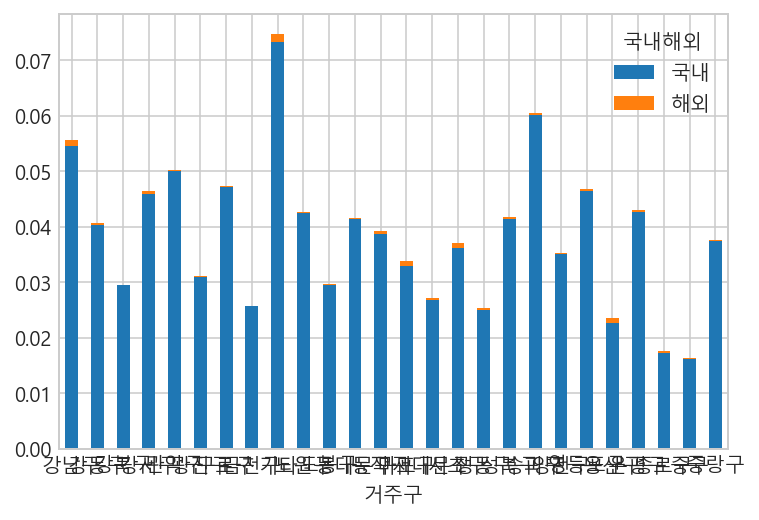

In [102]:
# 해외유입 여부에 따라 막대그래프를 그립니다.
# stacked=True 로 두 가지를 함께 그립니다.
pd.crosstab(df['거주구'], df['국내해외'], normalize = True).plot.bar(stacked = True, rot = 0)

## pivot_table 사용하기

In [103]:
# 거주구별 해외유입 여부에 따른 빈도수 구하기
# gu_over_count
pd.pivot_table(data = df, index = '거주구', columns = "국내해외", values = '환자', aggfunc = 'count')

국내해외,국내,해외
거주구,,
강남구,11920,230
강동구,8817,66
강북구,6430,19
강서구,10035,115
관악구,10924,68
광진구,6769,50
구로구,10301,45
금천구,5617,19
기타,16029,287


In [104]:
weekday_list = list('월화수목금토일')
gu_dow = pd.pivot_table(data = df, index = '거주구', columns = '요일명', values = '환자', aggfunc = 'count')
df_gu_weekday = gu_dow[weekday_list]
df_gu_weekday

요일명,월,화,수,목,금,토,일
거주구,,,,,,,
강남구,1487,1969,1960,1791,1892,1626,1425
강동구,892,1510,1414,1392,1335,1300,1040
강북구,905,969,957,1031,939,881,767
강서구,1130,1589,1642,1635,1629,1391,1134
관악구,1078,1934,1739,1653,1688,1575,1325
광진구,810,1096,1047,1060,1047,921,838
구로구,1095,1777,1604,1595,1607,1540,1128
금천구,546,910,876,924,894,804,682
기타,1840,2219,3096,2787,2431,2277,1666


In [105]:
# 거주구에 따른 요일별 확진자 빈도수
# df_gu_weekday[weekday_list].style.bar()

## groupby 사용하기

In [106]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하기


### Groupby의 unstack()
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html

<img src="https://pandas.pydata.org/docs/_images/reshaping_unstack.png" width="600">

In [107]:
# "거주구", "해외유입" 으로 그룹화 하여 "환자" 컬럼으로 빈도수 구하고
# 마지막 인덱스를 컬럼으로 만들기


In [108]:
# 연도, 월을 멀티인덱스로 사용하는 빈도수 구하기


In [109]:
# unstack()으로 월을 컬럼으로 만들기


In [110]:
# ["연도", "월"] 로 그룹화 하고 "해외유입" 의 describe 값 보기
